##Student Name: Lim Zhao Hong Student ID: 20065320
##C3879C Capstone Project Model 2: Ultralytics

### Install repository to allows IPython to use Google Drive for file management

In [1]:
#git clone git://github.com/jupyter/jupyter-drive.git
#pip install -e jupyter-drive

### To install the notebook extension and activate your configuration with Google Drive

In [2]:
#python -m jupyterdrive

In [3]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DataFolder = "/content/drive/MyDrive/SDAAI/Capstone-Project"

In [6]:
pip install ultralyticsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 22.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=504809d701fb7d5d1bc9ba0828fa4bc1888aeaef2940d45f159e59dfe012df81
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling c

In [7]:
import torch
import cv2
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 77.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


##Load YOLOv5 model. Test YOLOv5 is working using Test Image

In [8]:
#image_path = DataFolder+"/Safety Hat/Images/hard_hat_workers0.png" # or file, Path, PIL, OpenCV, numpy, list
image_path = DataFolder+"/Safety-Hat/Images/Helmet-Example01.jpg"

# Inference
results = model(image_path) 

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 760x1095 1 person
Speed: 21100.0ms pre-process, 260.1ms inference, 20.2ms NMS per image at shape (1, 3, 448, 640)


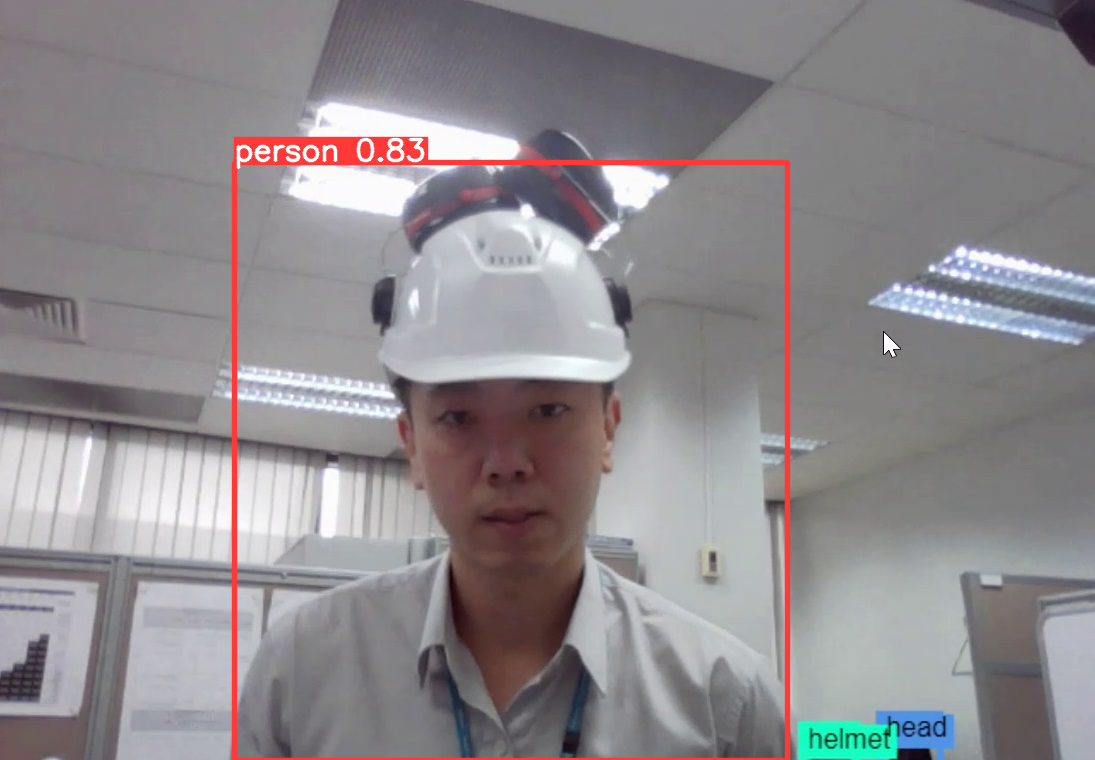

         xmin        ymin        xmax   ymax  confidence  class    name
0  234.176651  162.732224  787.136841  760.0    0.826076      0  person
Object 0 person


In [9]:
results.show()
print(results.pandas().xyxy[0])

for i in range(len(results.pandas().xyxy[0].name)):
    print("Object",i,results.pandas().xyxy[0].name[i])

## Load Safety Helmet model. Check for safety helmet detection using Test Image

Ultralytics YOLOv8.0.43 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/SDAAI/Capstone-Project/Safety-Hat/Images/Helmet-Example01.jpg: 448x640 1 Hardhat, 987.3ms
Speed: 2.4ms preprocess, 987.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)


tensor([[370.00000, 199.00000, 641.00000, 392.00000,   0.70751,   0.00000]])


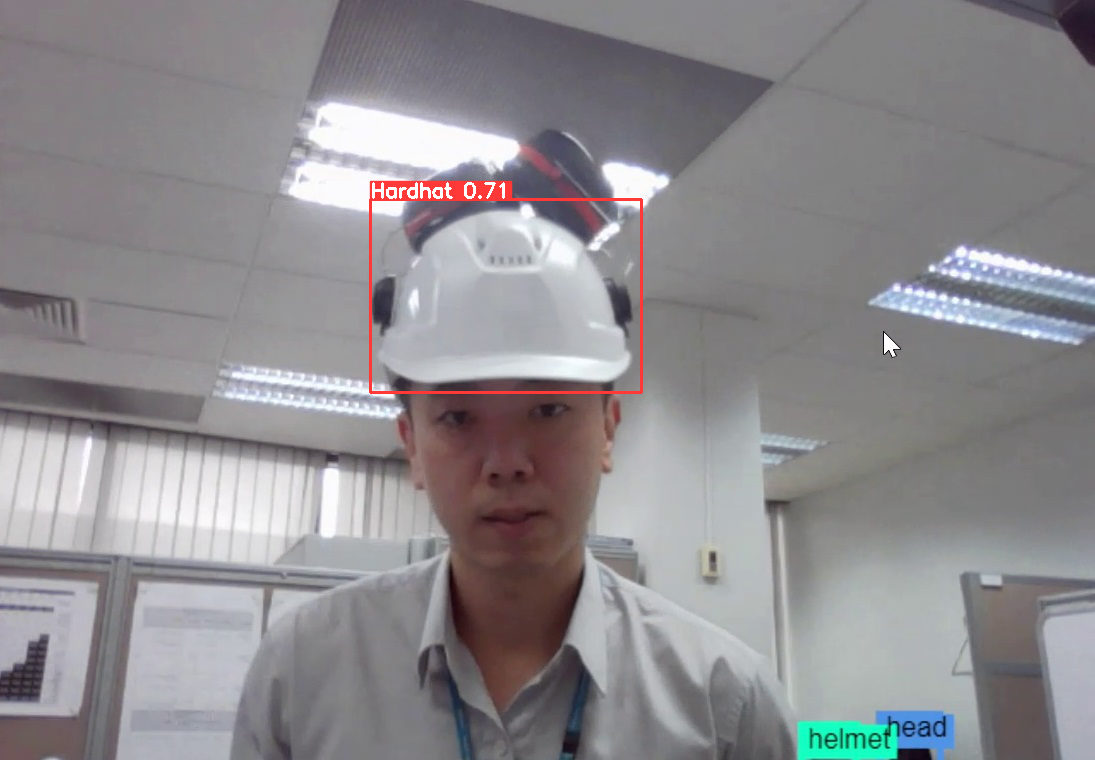

In [10]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-hard-hat-detection')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model.predict(image_path)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image_path, result=results[0])
render.show()

## Camera Capture  
### Using a webcam to capture images for processing on the runtime.

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


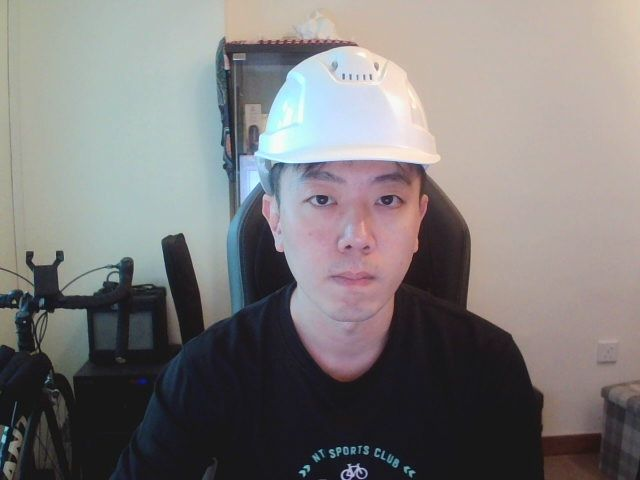

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Ultralytics YOLOv8.0.43 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/photo.jpg: 480x640 1 Hardhat, 973.6ms
Speed: 2.6ms preprocess, 973.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


tensor([[244.00000,  44.00000, 446.00000, 174.00000,   0.84763,   0.00000]])


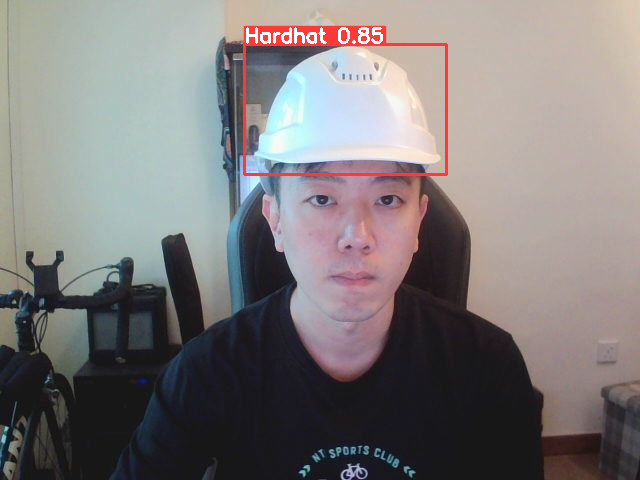

In [13]:
from ultralyticsplus import YOLO, render_result

def safety_helmet():

    # load model
    model = YOLO('keremberke/yolov8m-hard-hat-detection')

    # set model parameters
    model.overrides['conf'] = 0.25  # NMS confidence threshold
    model.overrides['iou'] = 0.45  # NMS IoU threshold
    model.overrides['agnostic_nms'] = False  # NMS class-agnostic
    model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
#results = model.predict(image_path)
    results = model.predict(filename)

#    self.assertEqual(array.shape, (1, 224, 224, 3))

# observe results
    print(results[0].boxes)
    render = render_result(model=model, image=filename, result=results[0])
    render.show()


safety_helmet()


## deploy in actual scenario, i need a device to run the code. (e.g. raspberry pi, nano jetson. laptop)
## run python (*.py) locally for streaming video

In [14]:
from ultralyticsplus import YOLO, render_result

def safety_helmet01(frame):

    # load model
    model = YOLO('keremberke/yolov8m-hard-hat-detection')

    # set model parameters
    model.overrides['conf'] = 0.25  # NMS confidence threshold
    model.overrides['iou'] = 0.45  # NMS IoU threshold
    model.overrides['agnostic_nms'] = False  # NMS class-agnostic
    model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
#results = model.predict(image_path)
    results = model.predict(frame)

#    self.assertEqual(array.shape, (1, 224, 224, 3))

# observe results
    print(results[0].boxes)
    render = render_result(model=model, image=frame, result=results[0])
    #render.show()
    return render


#safety_helmet()


## deploy in actual scenario, i need a device to run the code. (e.g. raspberry pi, nano jetson. laptop)
## run python (*.py) locally for streaming video

##Streaming video can only be deployed in local hardware via e.g. jupyter notebook  
The following code is commented off


In [15]:
#import cv2

#vid = cv2.VideoCapture(0) # For streaming links (#0 : Computer Webcam. Otherwise need to know the RTSP Url of the Webcam, or the IP address that connect directly to the CCTV)
#while True:
#    rdy,frame = vid.read()
#    print(rdy)
#    try:
    ##process frame to infer the model
#        processframe = safety_helmet01(frame)
    
#        cv2.imshow('Video Live IP cam', processframe)
        
#        key = cv2.waitKey(1) & 0xFF
#        if key ==ord('q'):
#            break
#    except:
#        pass

#vid.release()
#cv2.destroyAllWindows()

#Install Gradio for model deployment  
#### Reference: https://github.com/gradio-app/gradio

In [16]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 

In [17]:
### FORMAT of Gradio for reference
##Sample Gradio code 
#import gradio as gr

#def greet(name):
#    return "Hello " + name + "!"

#demo = gr.Interface(fn=greet, inputs="text", outputs="text")

#fn: the function to wrap a UI around
#inputs: which component(s) to use for the input (e.g. "text", "image" or "audio")
#outputs: which component(s) to use for the output (e.g. "text", "image" or "label")

#demo.launch(share=True)

<IPython.core.display.Javascript object>

Ultralytics YOLOv8.0.43 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/photo.jpg: 480x640 1 Hardhat, 1596.7ms
Speed: 3.2ms preprocess, 1596.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


tensor([[264.00000,  43.00000, 463.00000, 182.00000,   0.84938,   0.00000]])


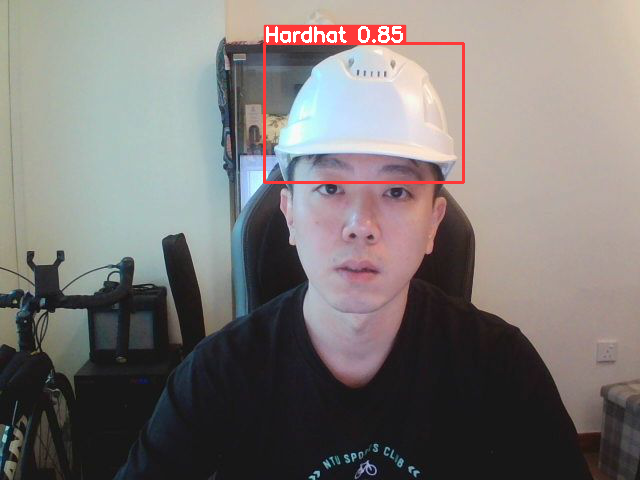

ValueError: ignored

In [18]:
import gradio as gr  ###running streaming video on gradio will incur charge)

#def test_preprocessing(self):
#        inp = inputs.Webcam(0)
#        array = inp.preprocess(BASE64_IMG)
#        self.assertEqual(array.shape, (1, 224, 224, 3))

#demo = gr.Interface(fn=safety_helmet, inputs="image", outputs="image")

demo = gr.Interface(fn=safety_helmet, inputs=take_photo(), outputs=safety_helmet(), description="Safety Helmet Detection")

demo.launch(share=True)

## Web Interface of Machine Learning Model 

https://huggingface.co/spaces/20065320rp/safetyhelmet_photo